# Transfer Learning

### → What we're doing here is as we know that VGG16 is trained on the "imagenet" weights!...imagenet is the competition where in they create many Convolution Neural Net models which are trained over billions of images..and those models can classify upto 1000 different classes!..so what we're doing is basically using those "Weights" of the filters which were used in the VGG16 architecture!..so we're just using the weights...the input and the output layers of "our" model are provided by us!...so i.e why i've mentioned <include_top = False> and the weights as imagenet

### → And then we're setting the layers.trainable = False..i.e we don't want our weights...instead we're using the weights of VGG16's filters..so we're not gonna train the model with our weights..we're just gonna use the VGG16 filter's weights!

### → Now as we set the include_top = False..so we'll be having the only the Convolution Layers and in that we're Flattening the Last Layer i.e the MaxPool unit after the flattened o/p is represented as <vgg.output> then we're creating "our" Model where in the i/ps are the vgg.inputs i.e the Convolution,Maxpool Layers and the o/p layer is of our's i.e the Flattened Part and the last softmax part of 4 logits!...so by this we created a "TransferLearning" Model and Now we need to compile and run the model!

### →There're many such pretrained model available in the Keras Library,if one is to classify more number of classes then one must have a look at the number of parameters that are to be used for the Model and we can look at these parameters in the Keras Documentation where in they've provided all the pretrained models!

In [37]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten
from glob import glob
import os


## Creating the Validation Dataset

In [38]:
name_list = [x for x in glob('/content/drive/My Drive/CottonPlant/data/test/*')]
name_list

['/content/drive/My Drive/CottonPlant/data/test/diseased cotton plant',
 '/content/drive/My Drive/CottonPlant/data/test/diseased cotton leaf',
 '/content/drive/My Drive/CottonPlant/data/test/fresh cotton leaf',
 '/content/drive/My Drive/CottonPlant/data/test/fresh cotton plant',
 '/content/drive/My Drive/CottonPlant/data/test/test data comp files']

In [39]:
diseased_plant = '/content/drive/My Drive/CottonPlant/data/test/diseased cotton plant'
diseased_leaf = '/content/drive/My Drive/CottonPlant/data/test/diseased cotton leaf'
fresh_cotton_leaf = '/content/drive/My Drive/CottonPlant/data/test/fresh cotton leaf'
fresh_cotton_plant = '/content/drive/My Drive/CottonPlant/data/test/fresh cotton plant'
validation_path = '/content/drive/My Drive/CottonPlant/validation'

In [40]:
diseased_plant_img = os.listdir(diseased_plant)
diseased_leaf_img = os.listdir(diseased_leaf)
fresh_cotton_leaf_img = os.listdir(fresh_cotton_leaf)
fresh_cotton_plant_img = os.listdir(fresh_cotton_plant)

In [41]:
import shutil
import random

In [42]:
def copyimage(i,to_path,dest_path):
  for j in range(len(i)):
    image = i[j]
    topath = os.path.join(to_path,image)
    destination = os.path.join(dest_path,image)
    shutil.copy2(topath,destination)

In [43]:
copyimage(diseased_plant_img,diseased_plant,validation_path)

In [44]:
copyimage(diseased_leaf_img,diseased_leaf,validation_path)
copyimage(fresh_cotton_leaf_img,fresh_cotton_leaf,validation_path)
copyimage(fresh_cotton_plant_img,fresh_cotton_plant,validation_path)

In [45]:
train_len = glob('/content/drive/My Drive/CottonPlant/data/train/*')
len(train_len)

4

In [46]:
vgg = VGG16(include_top = False,weights='imagenet',input_shape=[224,224,3])

In [47]:
for i in vgg.layers:
  i.trainable = False

In [48]:
vgg.output

<tf.Tensor 'block5_pool/MaxPool_1:0' shape=(None, 7, 7, 512) dtype=float32>

In [49]:
x = Flatten()(vgg.output)
prediction = Dense(len(train_len),activation='softmax')(x)
model = Model(inputs = vgg.input,outputs = prediction)


In [50]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [51]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/CottonPlant/data/train',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
testing_set = test_datagen.flow_from_directory('/content/drive/My Drive/CottonPlant/data/val',
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)


Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


**Here 61 indicates the number of batches!...i.e as the number of images in the training images are 1951 and the batch size is 32 so if you divide 1951 with 32 you get ~61 so that is the number of batches which is used!**

In [54]:
r = model.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    validation_data = testing_set,
    epochs = 10,
    validation_steps = len(testing_set)
)

Epoch 1/10
61/61 [==============================] - 172s 3s/step - loss: 0.6593 - accuracy: 0.7714 - val_loss: 0.2374 - val_accuracy: 0.9136
Epoch 2/10
61/61 [==============================] - 41s 668ms/step - loss: 0.2215 - accuracy: 0.9195 - val_loss: 0.1998 - val_accuracy: 0.9383
Epoch 3/10
61/61 [==============================] - 41s 665ms/step - loss: 0.1683 - accuracy: 0.9513 - val_loss: 0.2458 - val_accuracy: 0.9043
Epoch 4/10
61/61 [==============================] - 41s 668ms/step - loss: 0.1409 - accuracy: 0.9544 - val_loss: 0.1729 - val_accuracy: 0.9383
Epoch 5/10
61/61 [==============================] - 41s 667ms/step - loss: 0.1048 - accuracy: 0.9682 - val_loss: 0.1204 - val_accuracy: 0.9599
Epoch 6/10
61/61 [==============================] - 41s 672ms/step - loss: 0.0863 - accuracy: 0.9739 - val_loss: 0.1502 - val_accuracy: 0.9414
Epoch 7/10
61/61 [==============================] - 41s 669ms/step - loss: 0.0819 - accuracy: 0.9774 - val_loss: 0.1355 - val_accuracy: 0.9506
E

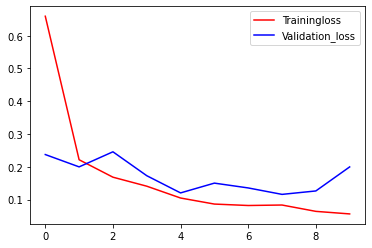

In [55]:
plt.plot(r.history['loss'],label = 'Trainingloss',color = 'red')
plt.plot(r.history['val_loss'],label  = 'Validation_loss',color = 'blue')
plt.legend()
plt.show()

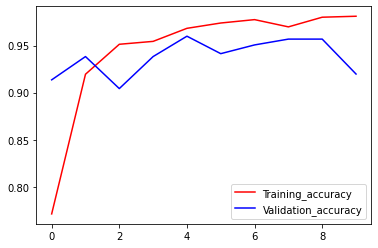

In [56]:
plt.plot(r.history['accuracy'],label = 'Training_accuracy',color = 'red')
plt.plot(r.history['val_accuracy'],label  = 'Validation_accuracy',color = 'blue')
plt.legend()
plt.show()

In [57]:
os.listdir('/content/drive/My Drive/CottonPlant/data/val')

['diseased cotton plant',
 'diseased cotton leaf',
 'fresh cotton leaf',
 'fresh cotton plant']

In [60]:
from tensorflow.keras.preprocessing import image

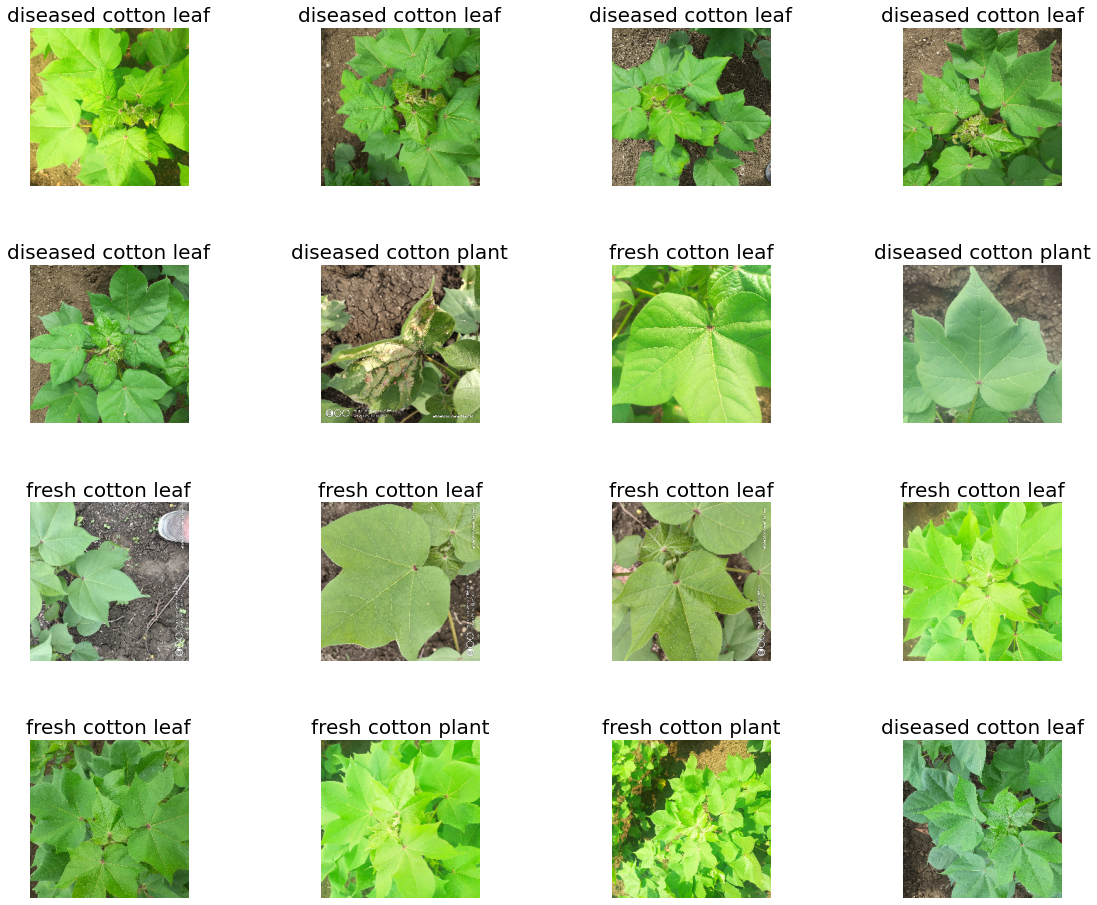

In [68]:
folder_path = '/content/drive/My Drive/CottonPlant/validation'
image_list = os.listdir(folder_path)
fig = plt.figure(figsize=(20,16))
row = 4
col = 4
j = 0
for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size=(224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)
  label = model.predict(image_data)
  #print(label)
  if label[0][0] == 1:
    k = 'diseased cotton plant'
  elif label[0][1] == 1:
    k = 'diseased cotton leaf'
  elif label[0][2] == 1:
    k = 'fresh cotton leaf'
  elif label[0][3] == 1:
    k = 'fresh cotton plant'
  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')
plt.show()